<h1> Data Analytics Report </h1>

<h2> United Kingdom Road Accident Data Analysis </h2>
<h3> Inclusive Years: 2019 - 2022</h3>

<h1> Importing Libraries</h1>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway


In [2]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
accident = pd.read_csv('accident_data.csv')

In [4]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


accident

<h1> Data Preparation</h1>

In [5]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [6]:
accident.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [7]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

<h1> Data Cleansing </h1>

In [8]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [9]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('Road_Surface_Conditions')
accident['Road_Type'] = accident['Road_Type'].fillna('Road_Type')
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('Weather_Conditions')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])

In [10]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h1> Converting Object to DataTime Data Time </h1>

In [11]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True)

In [12]:
accident.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

<h1> Extracting date information using pandas date time </h1>

In [13]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek

In [14]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

In [15]:
#accident['Accident Date'] = accident['Accident Date'].str.strip()
#accident['AccidentDate'] = accident['AccidentDate'].str.replace('/', '-')

<h1>Data Analytics</h1>

<h1>Analyzing Each from the Data Set</h1>

<h2>Univariate</h2>

In [16]:
df_2019 = accident[accident['Year'] == 2019]
df_2019

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Road_Type,Urban,Weather_Conditions,Taxi/Private hire car,2019,8,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Road_Type,Urban,Weather_Conditions,Other vehicle,2019,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182110,2.01E+12,Slight,2019-12-20,54.985289,Darkness - no lighting,Dumfries and Galloway,-3.210294,1,1,Frost or ice,Single carriageway,Rural,Other,Car,2019,12,20,4
182111,2.01E+12,Serious,2019-12-21,54.984105,Daylight,Dumfries and Galloway,-3.193693,2,1,Frost or ice,Single carriageway,Rural,Other,Car,2019,12,21,5
182112,2.01E+12,Slight,2019-12-23,55.166369,Darkness - no lighting,Dumfries and Galloway,-2.992068,1,1,Frost or ice,Single carriageway,Rural,Fog or mist,Van / Goods 3.5 tonnes mgw or under,2019,12,23,0
182113,2.01E+12,Slight,2019-12-23,54.995154,Darkness - lights lit,Dumfries and Galloway,-3.058338,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2019,12,23,0


<h3>Q: How many incidents happened under light condition</h3>

In [17]:
df_2019 ['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       133042
Darkness - lights lit           35769
Darkness - no lighting          10842
Darkness - lighting unknown      1768
Darkness - lights unlit           694
Name: count, dtype: int64

<h1>Insight 1: How many incidents happened in Highland? </h1>

2021 incidents happened in Highland.


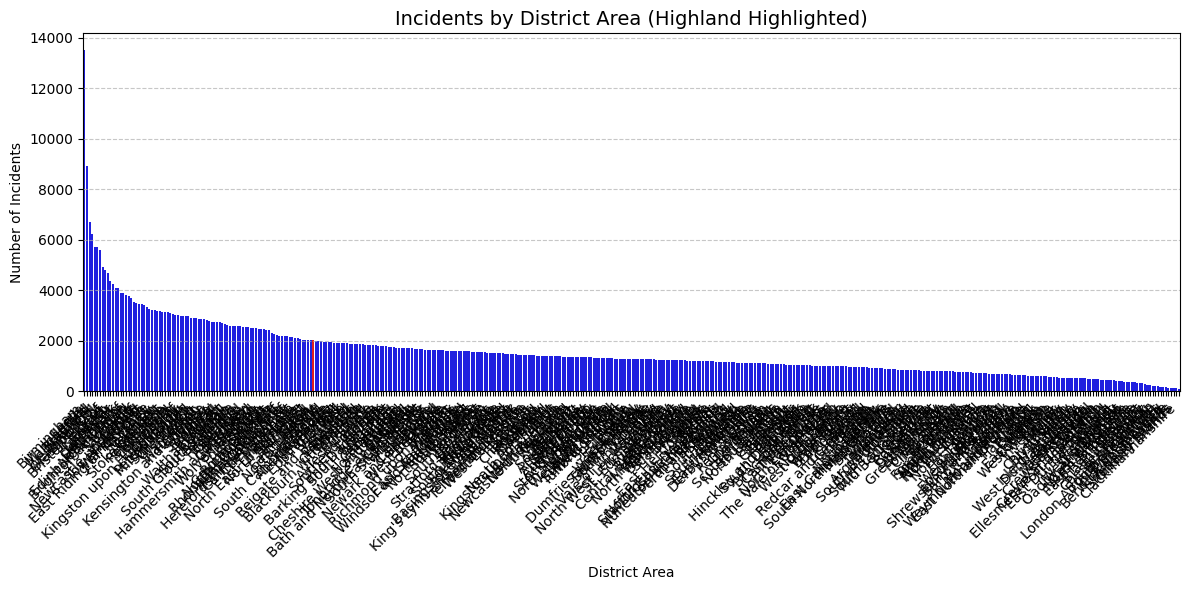

In [18]:
highland_incidents = accident[accident['District Area'] == 'Highland'].shape[0]
print(f'{highland_incidents} incidents happened in Highland.')


district_counts = accident['District Area'].value_counts().reset_index()
district_counts.columns = ['District Area', 'Incidents']


plt.figure(figsize=(12, 6))

colors = ['red' if district == 'Highland' else 'blue' for district in district_counts['District Area']]
sns.barplot(
    x='District Area',
    y='Incidents',
    data=district_counts,
    hue='District Area',  
    palette=colors,
    legend=False  
)

plt.title('Incidents by District Area (Highland Highlighted)', fontsize=14)
plt.xlabel('District Area') 
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

<h1>Insights 2: There is 36378 incidents happened in Highlind, Now, What is the average number of casualties happened in Highland on 2020?</h1>

The average number of casualties in Highland in 2020 was 1.44.


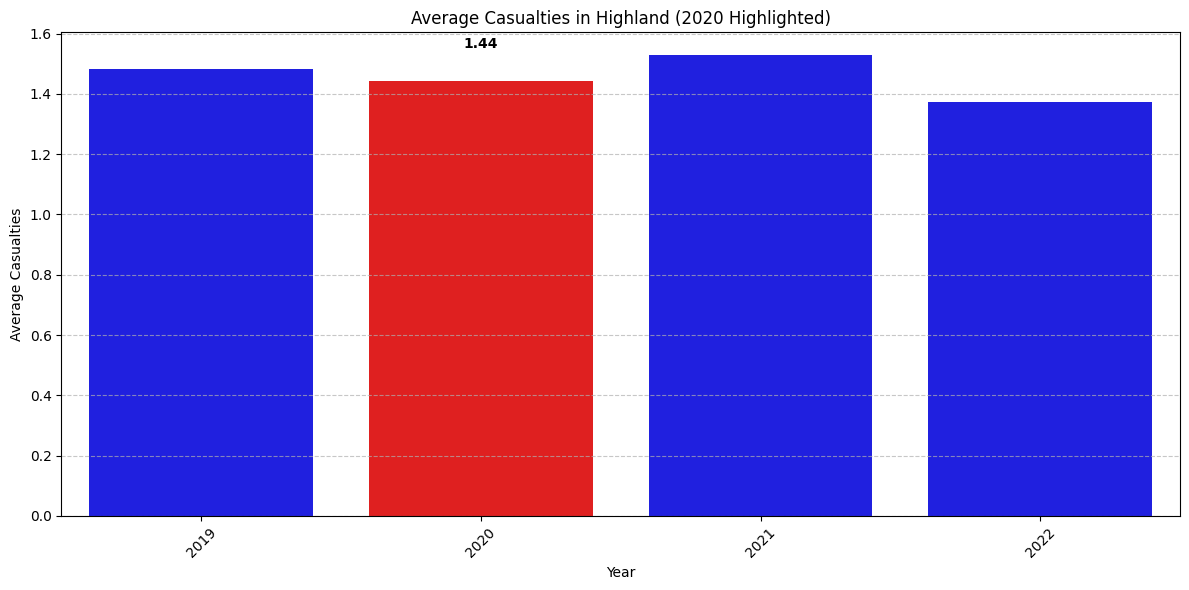

In [39]:
accident_2020 = accident[(accident['District Area'] == 'Highland') & (accident['Year'] == 2020)]
mean_casualties = round(accident_2020['Number_of_Casualties'].mean(), 2)
print(f"The average number of casualties in Highland in 2020 was {mean_casualties}.")


highland_data = accident[accident['District Area'] == 'Highland']
yearly_avg = highland_data.groupby('Year')['Number_of_Casualties'].mean().reset_index()

plt.figure(figsize=(12, 6))

colors = ['red' if year == 2020 else 'blue' for year in yearly_avg['Year']]


ax = sns.barplot(
    x='Year',
    y='Number_of_Casualties',
    data=yearly_avg,
    hue='Year',
    palette=colors,
    errorbar=None,      
    legend=False        )


for index, row in yearly_avg.iterrows():
    if row['Year'] == 2020:
        ax.text(
            index,
            row['Number_of_Casualties'] + 0.1,
            f"{mean_casualties}",
            ha='center',
            va='bottom',
            fontweight='bold'
        )

plt.title('Average Casualties in Highland (2020 Highlighted)' )
plt.xlabel('Year')
plt.ylabel('Average Casualties')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h1> Insight 3: The average number of casualties happened in Highland on 2020 is 1.44, What is the Average Number of casualties happened in Kensington and Chelsea on 2019? </h1>

The average number of casualties in Kensington and Chelsea in 2019 was 1.15.


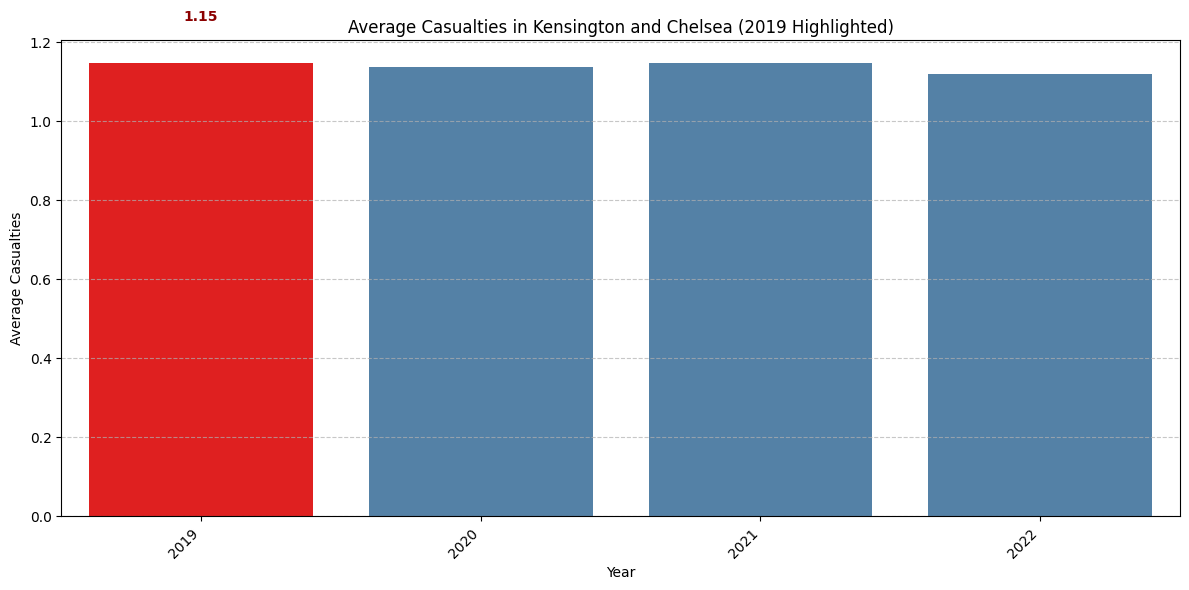

In [44]:
accident_2019 = accident[(accident['District Area'] == 'Kensington and Chelsea') & (accident['Year'] == 2019)]
mean_casualties = round(accident_2019['Number_of_Casualties'].mean(), 2)
print(f"The average number of casualties in Kensington and Chelsea in 2019 was {mean_casualties}.")


kensington_data = accident[accident['District Area'] == 'Kensington and Chelsea']
yearly_avg = kensington_data.groupby('Year')['Number_of_Casualties'].mean().reset_index()


plt.figure(figsize=(12, 6))
colors = ['red' if year == 2019 else 'steelblue' for year in yearly_avg['Year']]

ax = sns.barplot(
    x='Year',
    y='Number_of_Casualties',
    data=yearly_avg,
    hue='Year',          
    palette=colors,
    errorbar=None,     
    legend=False         
)

for index, row in yearly_avg.iterrows():
    if row['Year'] == 2019:
        ax.text(
            index,
            row['Number_of_Casualties'] + 0.1,
            f"{mean_casualties}",
            ha='center',
            va='bottom',
            fontweight='bold',
            color='darkred'
        )

plt.title('Average Casualties in Kensington and Chelsea (2019 Highlighted)', )
plt.xlabel('Year')
plt.ylabel('Average Casualties')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h1> Insight 4: What is the average Number of casualties happened in Dumfries and Galloway on 2021?</h1>

The average number of casualties in Dumfries and Galloway in 2021 was 1.37.


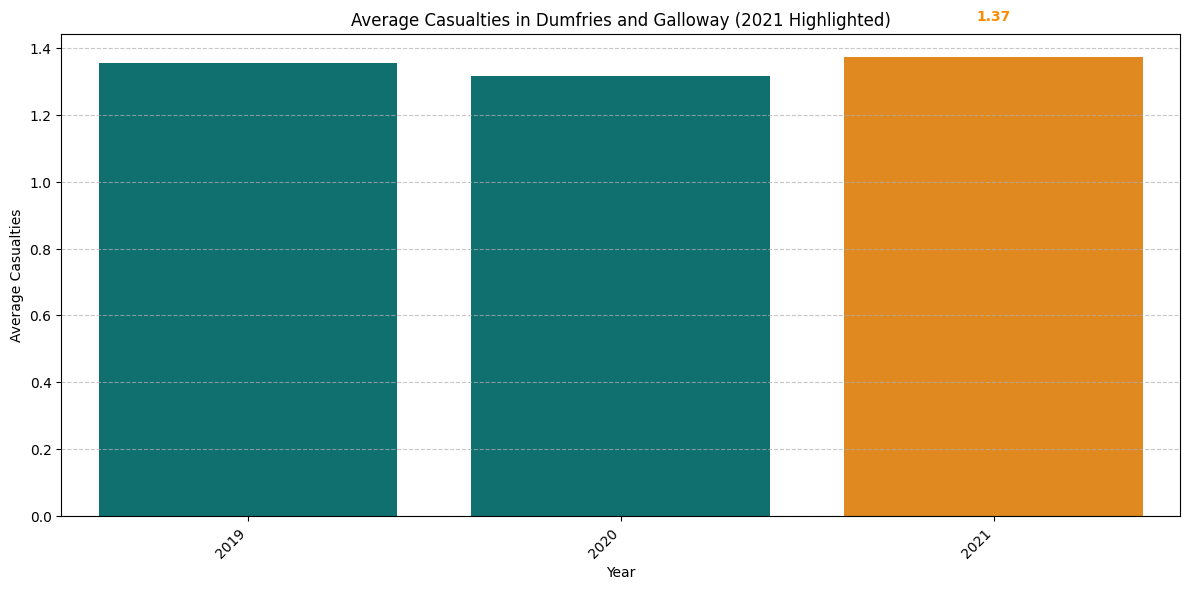

In [45]:
accident_2021 = accident[(accident['District Area'] == 'Dumfries and Galloway') & (accident['Year'] == 2021)]
mean_casualties = round(accident_2021['Number_of_Casualties'].mean(), 2)
print(f"The average number of casualties in Dumfries and Galloway in 2021 was {mean_casualties}.")


dumfries_data = accident[accident['District Area'] == 'Dumfries and Galloway']
yearly_avg = dumfries_data.groupby('Year')['Number_of_Casualties'].mean().reset_index()

plt.figure(figsize=(12, 6))

colors = ['darkorange' if year == 2021 else 'teal' for year in yearly_avg['Year']]

ax = sns.barplot(
    x='Year',
    y='Number_of_Casualties',
    data=yearly_avg,
    hue='Year',         
    palette=colors,
    errorbar=None,      
    legend=False        
)

for index, row in yearly_avg.iterrows():
    if row['Year'] == 2021:
        ax.text(
            index,
            row['Number_of_Casualties'] + 0.1,
            f"{mean_casualties}",
            ha='center',
            va='bottom',
            fontweight='bold',
            color='darkorange'
        )

plt.title('Average Casualties in Dumfries and Galloway (2021 Highlighted)')
plt.xlabel('Year')
plt.ylabel('Average Casualties')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h1> Insights 5: Which vehicle type is most involved in accidents? 

Car has the most casualties: 676692


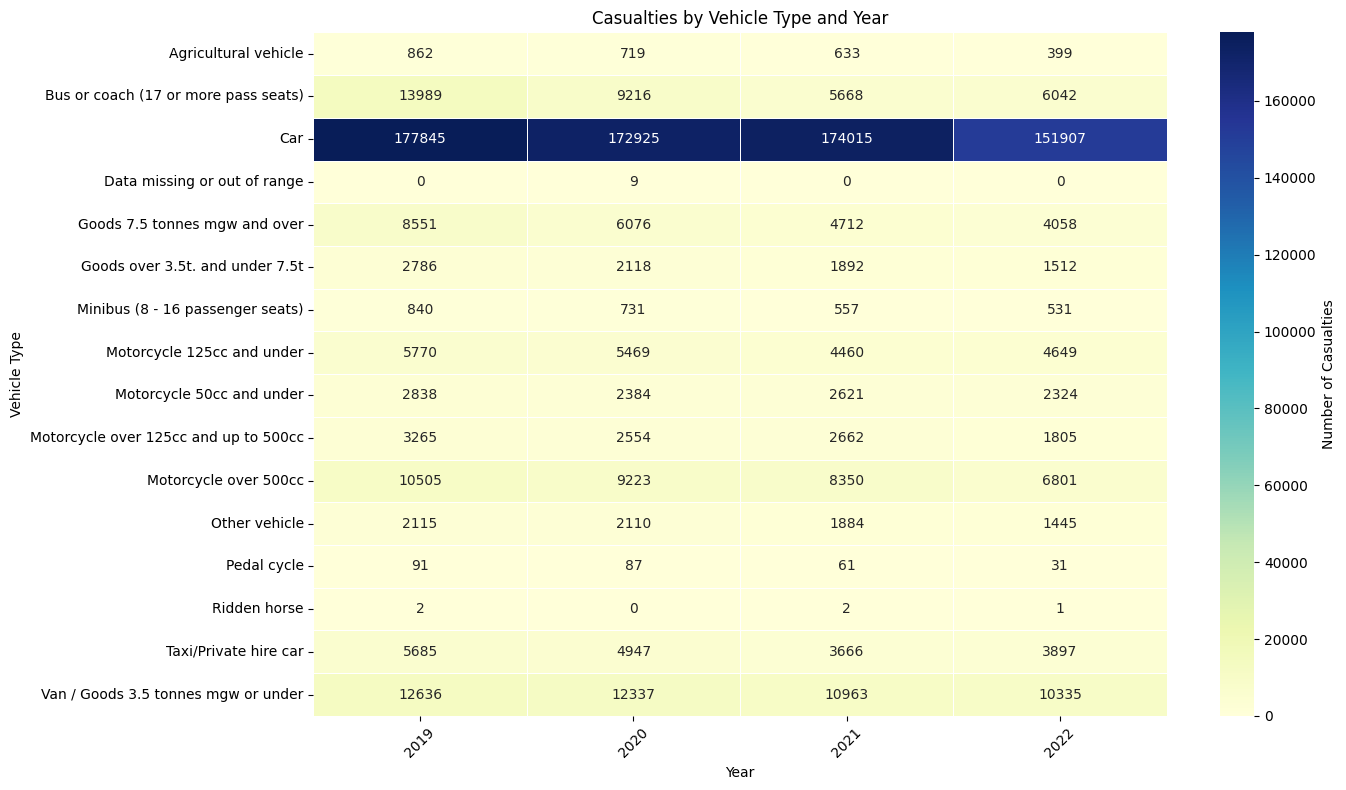

In [49]:
vehicle_casualties = accident.groupby('Vehicle_Type')['Number_of_Casualties'].sum().sort_values(ascending=False)
print(f"{vehicle_casualties.index[0]} has the most casualties: {vehicle_casualties.iloc[0]}")

numeric_cols = ['Number_of_Casualties', 'Year'] 
corr_matrix = accident.groupby('Vehicle_Type')[numeric_cols].corr()

pivot_table = accident.pivot_table(
    index='Vehicle_Type',
    columns='Year',
    values='Number_of_Casualties',
    aggfunc='sum',
    fill_value=0
)
plt.figure(figsize=(14, 8))

sns.heatmap(
    pivot_table,
    cmap='YlGnBu',
    annot=True,
    fmt='g',
    linewidths=0.5,
    cbar_kws={'label': 'Number of Casualties'}
)

plt.title('Casualties by Vehicle Type and Year')
plt.xlabel('Year')
plt.ylabel('Vehicle Type')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<h1> Insight 6: Do larger vehicle type influence the accidents in which road type?

Bigger vehicles might be more likely to have accidents on certain roads.


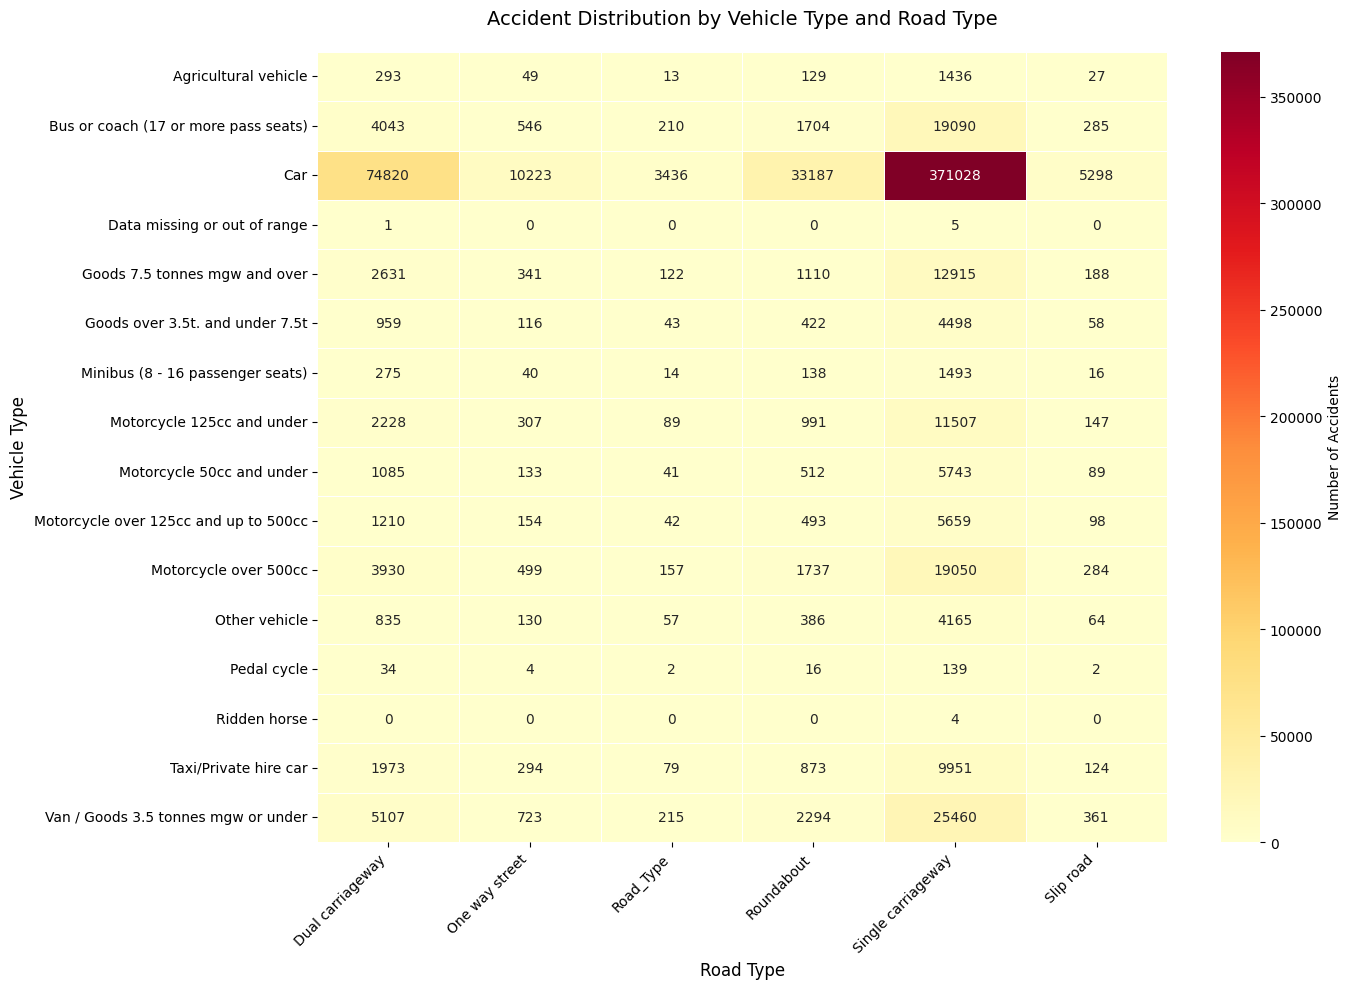

In [51]:
accident_counts = accident.groupby(['Vehicle_Type', 'Road_Type'])['Number_of_Casualties'].count().reset_index()
print("Bigger vehicles might be more likely to have accidents on certain roads.")

pivot_table = accident.pivot_table(
    index='Vehicle_Type',
    columns='Road_Type',
    values='Number_of_Casualties',
    aggfunc='count',
    fill_value=0
)

plt.figure(figsize=(14, 10))

sns.heatmap(
    pivot_table,
    cmap='YlOrRd',
    annot=True,
    fmt='d',
    linewidths=0.5,
    cbar_kws={'label': 'Number of Accidents'}
)

plt.title('Accident Distribution by Vehicle Type and Road Type', fontsize=14, pad=20)
plt.xlabel('Road Type', fontsize=12)
plt.ylabel('Vehicle Type', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<h1>Insights 7: The average latitude is  52.55, suggesting that the data is concentrated in a specific region. The Standard deviation of 1.40 suggest a wide spread of latitue. </h1>

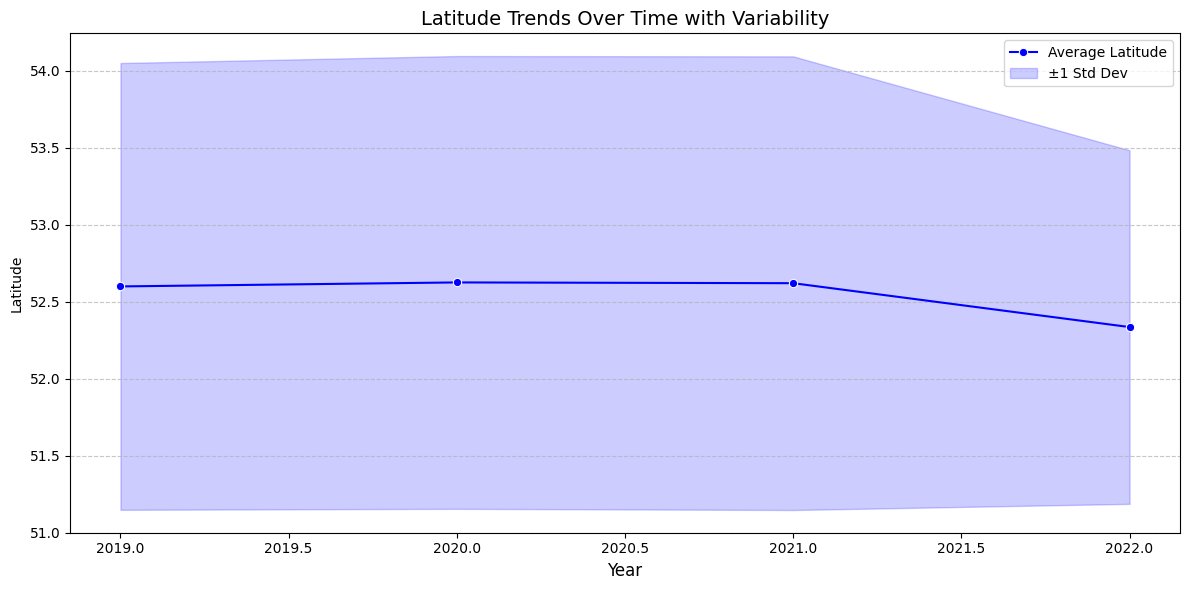

In [54]:
avg_latitude = accident['Latitude'].mean()
std_latitude = accident['Latitude'].std()

has_time_data = False
time_series = pd.DataFrame()

if 'Year' in accident.columns:
    time_series = accident.groupby('Year')['Latitude'].agg(['mean', 'std']).reset_index()
    if not time_series.empty:
        has_time_data = True

plt.figure(figsize=(12, 6))

if has_time_data:

    sns.lineplot(
        x='Year',
        y='mean',
        data=time_series,
        marker='o',
        color='blue',
        label='Average Latitude'
    )
    plt.fill_between(
        time_series['Year'],
        time_series['mean'] - time_series['std'],
        time_series['mean'] + time_series['std'],
        color='blue',
        alpha=0.2,
        label='±1 Std Dev'
    )
    plt.title('Latitude Trends Over Time with Variability', fontsize=14)
    plt.xlabel('Year', fontsize=12)
else:
    plt.axhline(
        avg_latitude,
        color='red',
        linestyle='--',
        label='Average Latitude'
    )
    plt.axhspan(
        avg_latitude - std_latitude,
        avg_latitude + std_latitude,
        color='gray',
        alpha=0.3,
        label='±1 Std Dev'
    )
    plt.title('Overall Latitude Distribution')
    plt.xlabel('Distribution')

plt.ylabel('Latitude')
plt.grid(axis='y', linestyle='--', alpha=0.7)

if has_time_data or 'Year' not in accident.columns:
    plt.legend()

plt.tight_layout()
plt.show()

<h1>Insight 8: The average longitude is -1.43, indicating a location in the western hemisphere. The standard deviation of 1.38 is similar spread to latitude</h1>

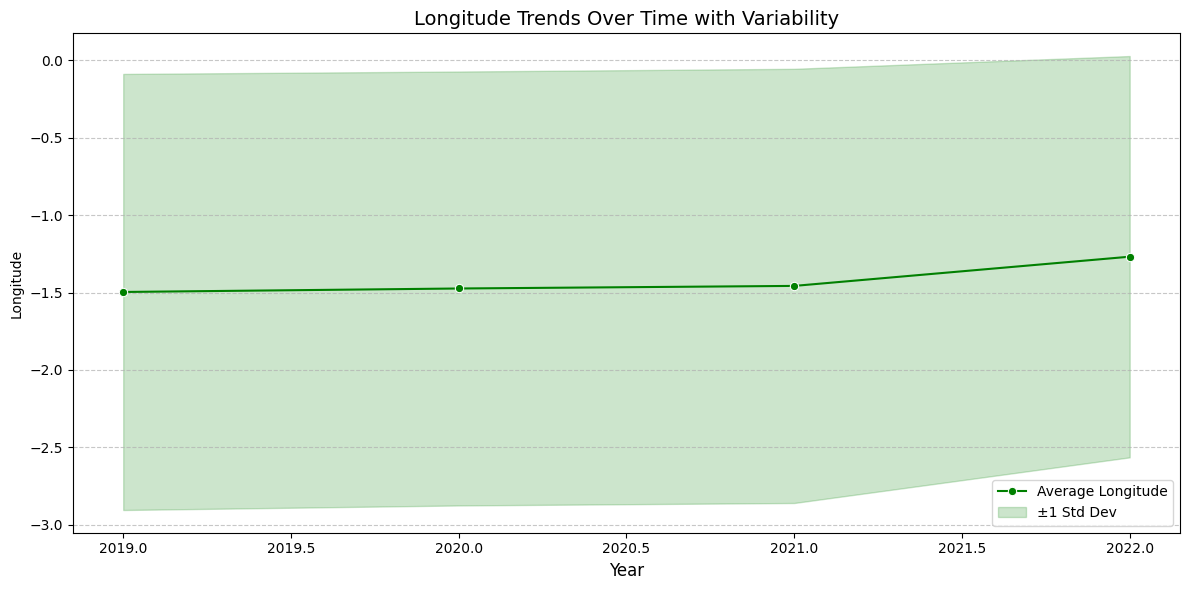

In [57]:
avg_longitude = accident['Longitude'].mean()
std_longitude = accident['Longitude'].std()
has_time_data = False
time_series = pd.DataFrame()

if 'Year' in accident.columns:
    time_series = accident.groupby('Year')['Longitude'].agg(['mean', 'std']).reset_index()
    if not time_series.empty:
        has_time_data = True

plt.figure(figsize=(12, 6))

if has_time_data:

    sns.lineplot(
        x='Year',
        y='mean',
        data=time_series,
        marker='o',
        color='green',
        label='Average Longitude'
    )
    plt.fill_between(
        time_series['Year'],
        time_series['mean'] - time_series['std'],
        time_series['mean'] + time_series['std'],
        color='green',
        alpha=0.2,
        label='±1 Std Dev'
    )
    plt.title('Longitude Trends Over Time with Variability', fontsize=14)
    plt.xlabel('Year', fontsize=12)
else:

    plt.axhline(
        avg_longitude,
        color='darkred',
        linestyle='--',
        label='Average Longitude'
    )
    plt.axhspan(
        avg_longitude - std_longitude,
        avg_longitude + std_longitude,
        color='pink',
        alpha=0.3,
        label='±1 Std Dev'
    )
    plt.title('Overall Longitude Distribution')
    plt.xlabel('Distribution', fontsize=12)

plt.ylabel('Longitude')
plt.grid(axis='y', linestyle='--', alpha=0.7)
if has_time_data or 'Year' not in accident.columns:
    plt.legend()
plt.tight_layout()
plt.show()

<h1>Insights 9: The average number of casualties is 1.36, indicating that most accidents involve a small number of casualties. The Standard deviation of 0.82 refers that a significant variation in the number of casualties.</h1>

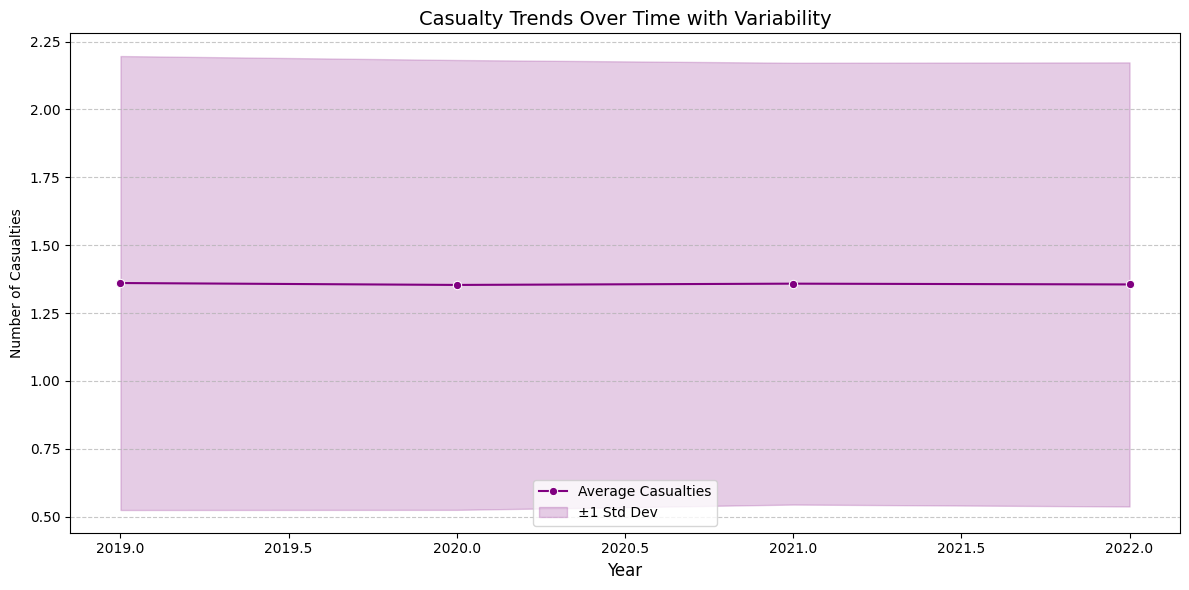

In [59]:
avg_casualty = accident['Number_of_Casualties'].mean()
std_casualty = accident['Number_of_Casualties'].std()
has_time_data = False
time_series = pd.DataFrame()

if 'Year' in accident.columns:
    time_series = accident.groupby('Year')['Number_of_Casualties'].agg(['mean', 'std']).reset_index()
    if not time_series.empty:
        has_time_data = True

plt.figure(figsize=(12, 6))

if has_time_data:
    sns.lineplot(
        x='Year',
        y='mean',
        data=time_series,
        marker='o',
        color='purple',
        label='Average Casualties'
    )
    plt.fill_between(
        time_series['Year'],
        time_series['mean'] - time_series['std'],
        time_series['mean'] + time_series['std'],
        color='purple',
        alpha=0.2,
        label='±1 Std Dev'
    )
    plt.title('Casualty Trends Over Time with Variability', fontsize=14)
    plt.xlabel('Year', fontsize=12)
else:

    plt.axhline(
        avg_casualty,
        color='darkorange',
        linestyle='--',
        label='Average Casualties'
    )
    plt.axhspan(
        avg_casualty - std_casualty,
        avg_casualty + std_casualty,
        color='gold',
        alpha=0.3,
        label='±1 Std Dev'
    )
    plt.title('Overall Casualty Distribution')
    plt.xlabel('Distribution')

plt.ylabel('Number of Casualties')
plt.grid(axis='y', linestyle='--', alpha=0.7)

if has_time_data or 'Year' not in accident.columns:
    plt.legend()

plt.tight_layout()
plt.show()

<h1>Insight 10: What is the maximum number of casualties reported in each year?</h1>

Maximum casualties per year:
 Year  Number_of_Casualties
 2019                    68
 2020                    62
 2021                    48
 2022                    43


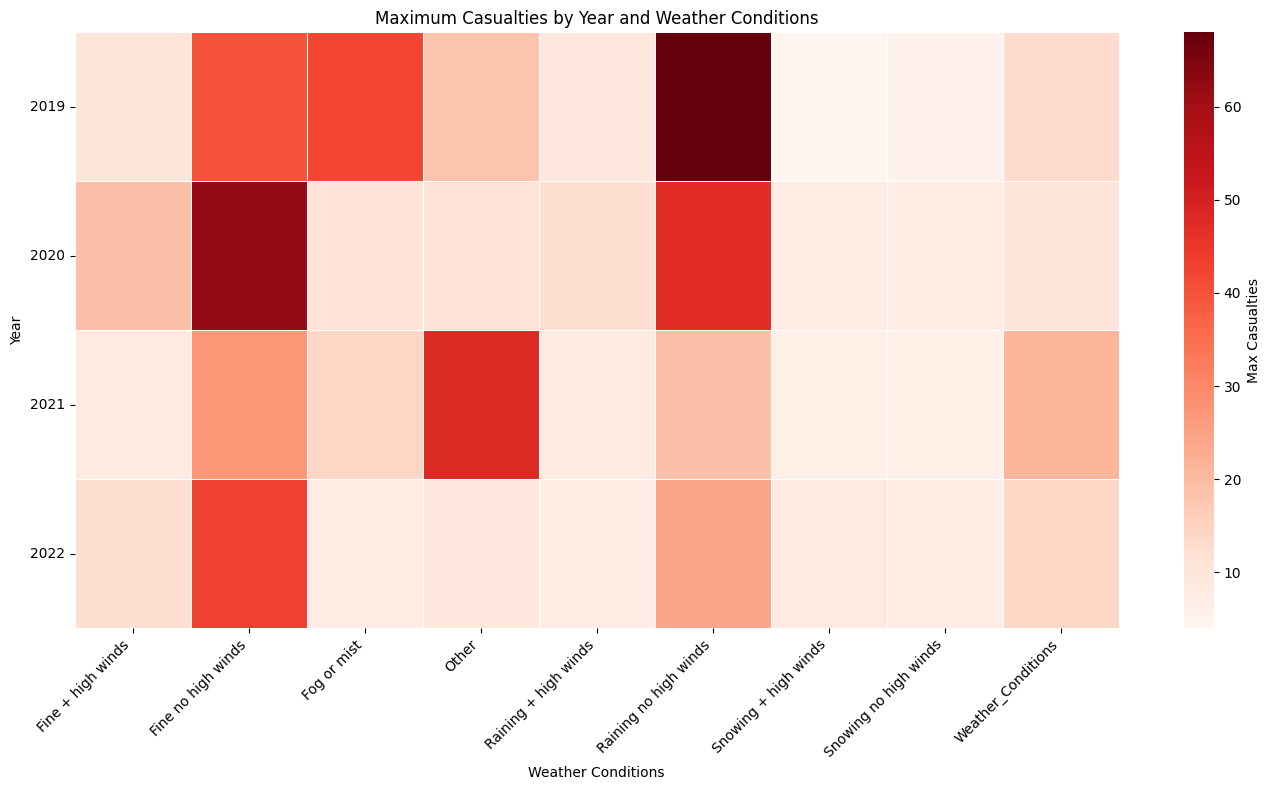

In [62]:
max_casualty = accident.groupby('Year')['Number_of_Casualties'].max().reset_index()
print(f'Maximum casualties per year:\n{max_casualty.to_string(index=False)}')

heatmap_data = pd.pivot_table(
    accident,
    values='Number_of_Casualties',
    index='Year',
    columns='Weather_Conditions', 
    aggfunc='max',
    fill_value=0
)

plt.figure(figsize=(14, 8))

sns.heatmap(
    heatmap_data,
    cmap='Reds',
 
    fmt='g',
    linewidths=0.5,
    cbar_kws={'label': 'Max Casualties'}
)
plt.title('Maximum Casualties by Year and Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Year')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<h1>Insight 11: What is the relationship between the number of casualties and vehicles involved over time?</h1>

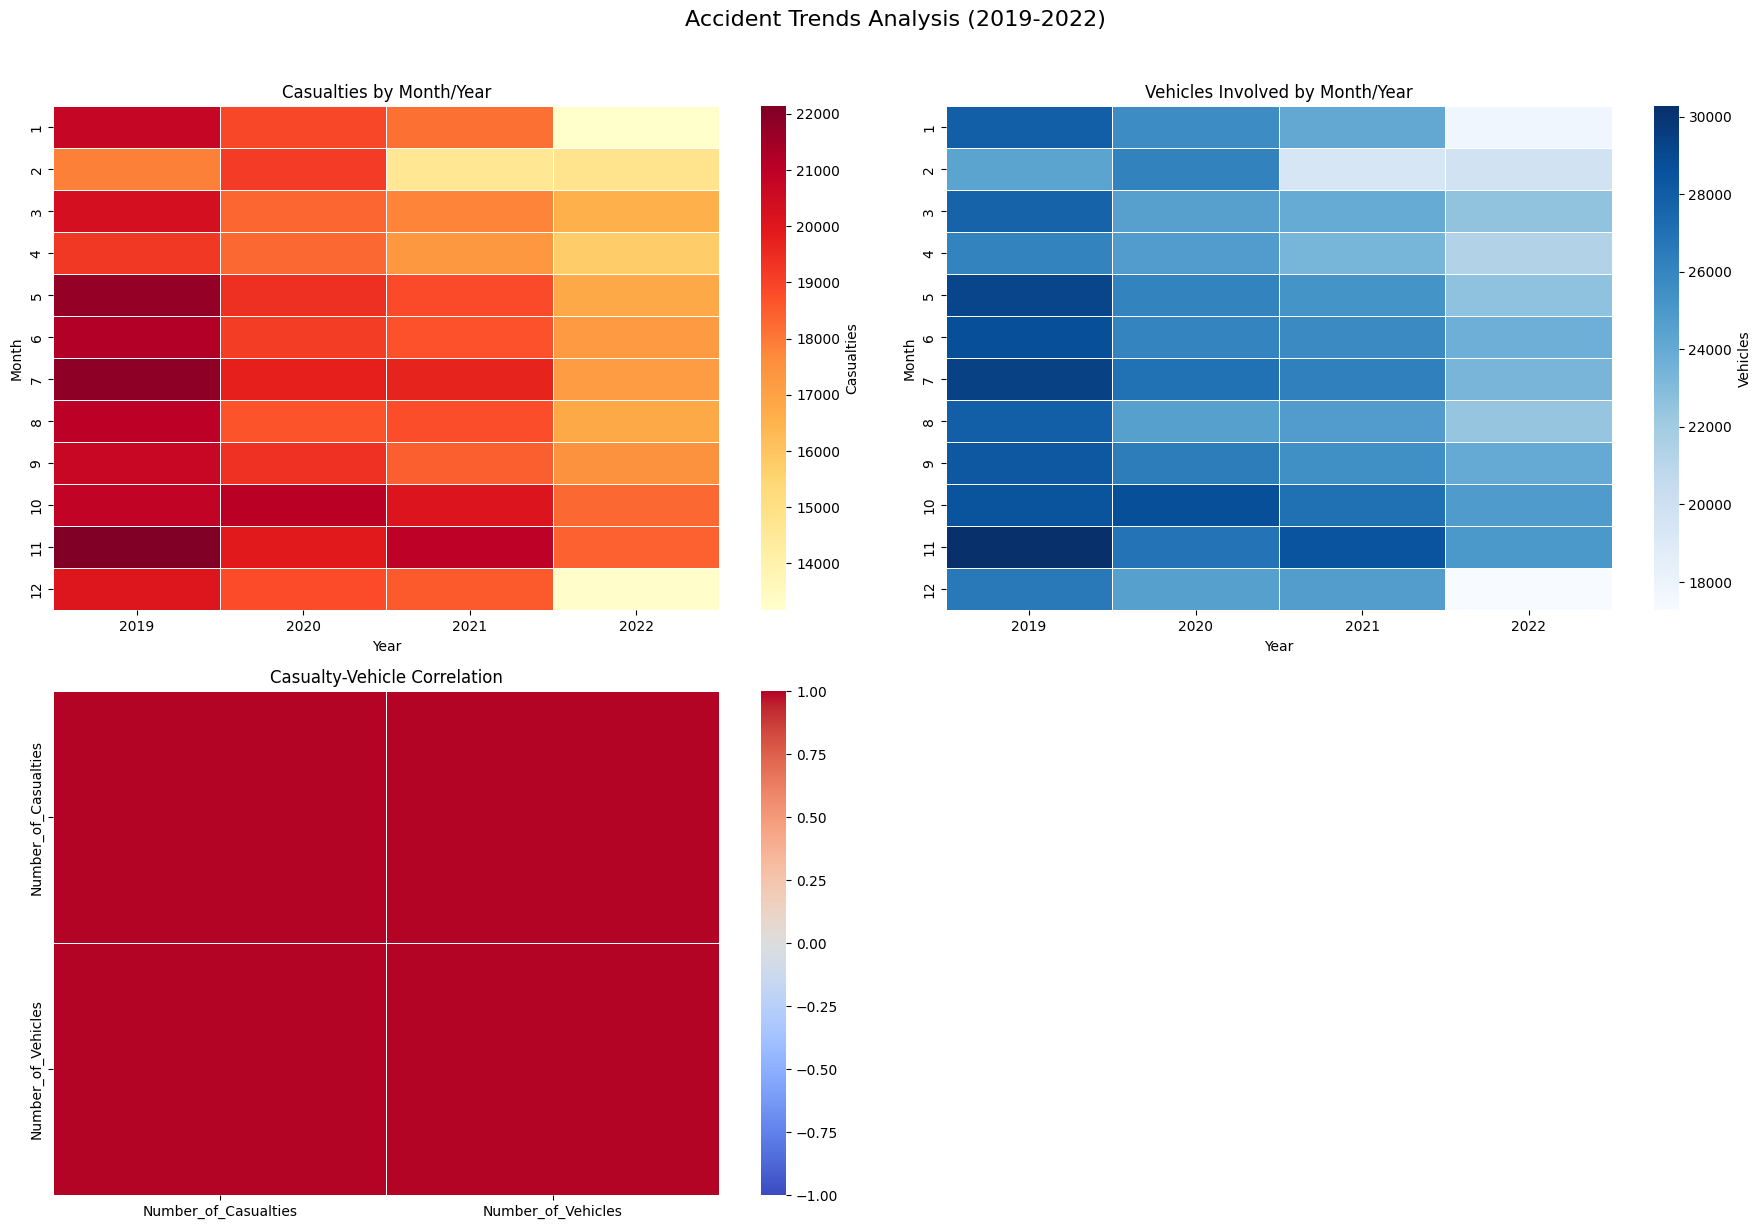

In [66]:
monthly_data = accident.groupby(['Year', 'Month'])[['Number_of_Casualties', 'Number_of_Vehicles']].sum().reset_index()
monthly_casualty = monthly_data.pivot(index='Month', columns='Year', values='Number_of_Casualties')
monthly_vehicles = monthly_data.pivot(index='Month', columns='Year', values='Number_of_Vehicles')
corr_matrix = monthly_data[['Number_of_Casualties', 'Number_of_Vehicles']].corr()

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

sns.heatmap(
    monthly_casualty,
    cmap='YlOrRd',
    fmt='g',
    linewidths=0.5,
    cbar_kws={'label': 'Casualties'},
    ax=axes[0,0]
)
axes[0,0].set_title('Casualties by Month/Year')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Month')

sns.heatmap(
    monthly_vehicles,
    cmap='Blues',
    fmt='g',
    linewidths=0.5,
    cbar_kws={'label': 'Vehicles'},
    ax=axes[0,1]
)
axes[0,1].set_title('Vehicles Involved by Month/Year')
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Month')

sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 12},
    ax=axes[1,0]
)
axes[1,0].set_title('Casualty-Vehicle Correlation')

fig.delaxes(axes[1,1])

plt.suptitle('Accident Trends Analysis (2019-2022)', fontsize=16, y=1.02)

plt.tight_layout()
plt.show()

<h1>Insights 12: What is the average number of casualties per month?</h1>

The average number of casualties per month is: 1.36


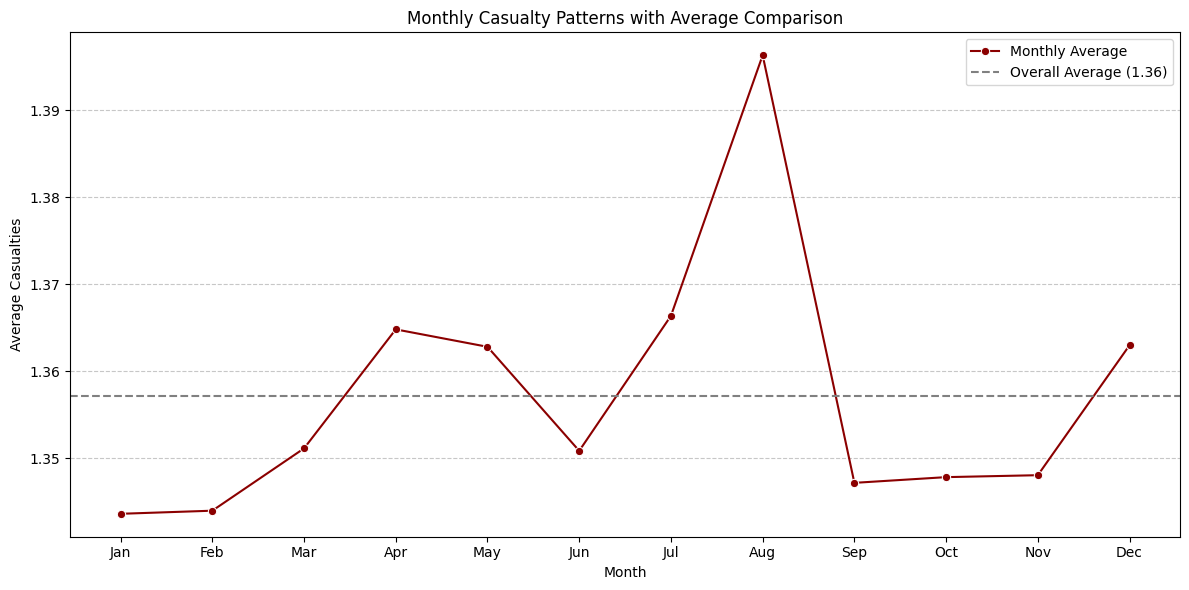

In [69]:
import numpy as np
monthly_avg = accident.groupby('Month')['Number_of_Casualties'].mean().reset_index()
overall_avg = monthly_avg['Number_of_Casualties'].mean()

print(f'The average number of casualties per month is: {overall_avg:.2f}')

plt.figure(figsize=(12, 6))

sns.lineplot(
    x='Month',
    y='Number_of_Casualties',
    data=monthly_avg,
    marker='o',
    color='darkred',
    label='Monthly Average'
)

plt.axhline(
    overall_avg,
    color='gray',
    linestyle='--',
    label=f'Overall Average ({overall_avg:.2f})'
)

plt.title('Monthly Casualty Patterns with Average Comparison')
plt.xlabel('Month')
plt.ylabel('Average Casualties')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

<h1>Insights 13: Does number of casualties has changed over time?</h1>

Annual casualty trend shows:
 Year  Number_of_Casualties
 2019                247780
 2020                230905
 2021                222146
 2022                195737


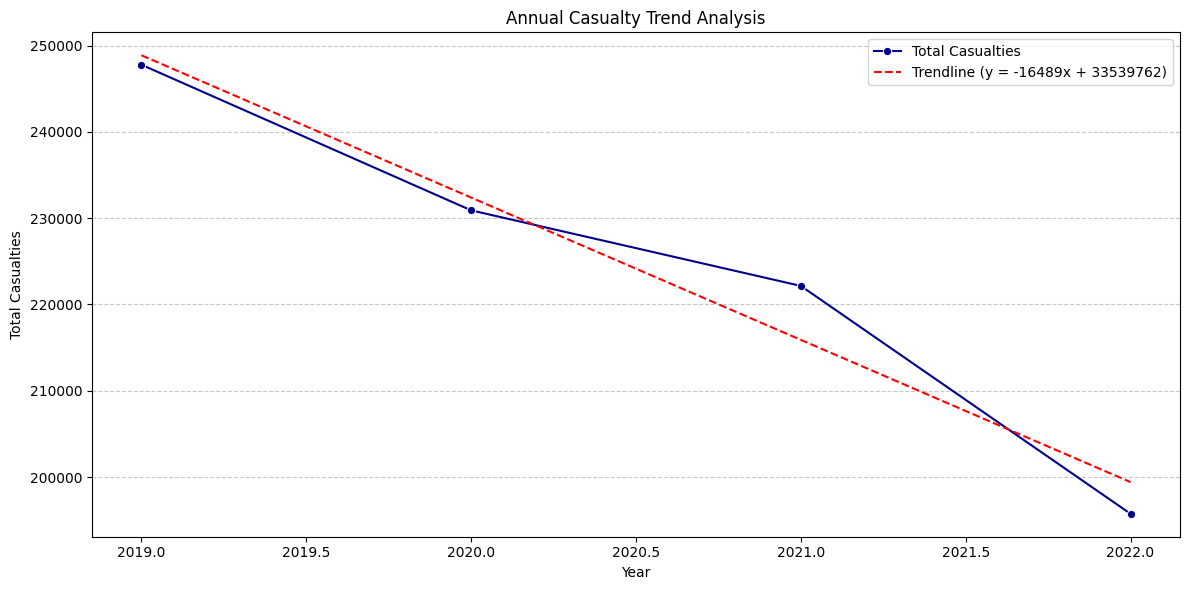

In [72]:
yearly_casualties = accident.groupby('Year')['Number_of_Casualties'].sum().reset_index()
print("Annual casualty trend shows:")
print(yearly_casualties.to_string(index=False))

plt.figure(figsize=(12, 6))

sns.lineplot(
    x='Year',
    y='Number_of_Casualties',
    data=yearly_casualties,
    marker='o',
    color='darkblue',
    label='Total Casualties'
)

z = np.polyfit(yearly_casualties['Year'], yearly_casualties['Number_of_Casualties'], 1)
p = np.poly1d(z)
plt.plot(yearly_casualties['Year'], p(yearly_casualties['Year']), "r--", label=f'Trendline (y = {z[0]:.0f}x + {z[1]:.0f})')

plt.title('Annual Casualty Trend Analysis')
plt.xlabel('Year')
plt.ylabel('Total Casualties')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

plt.show()



<h1>Insight 14: Are there other variables that might be more strongly correlated with the number of casualties, such as vehicle type, road conditions, or driver behavior?</h1>

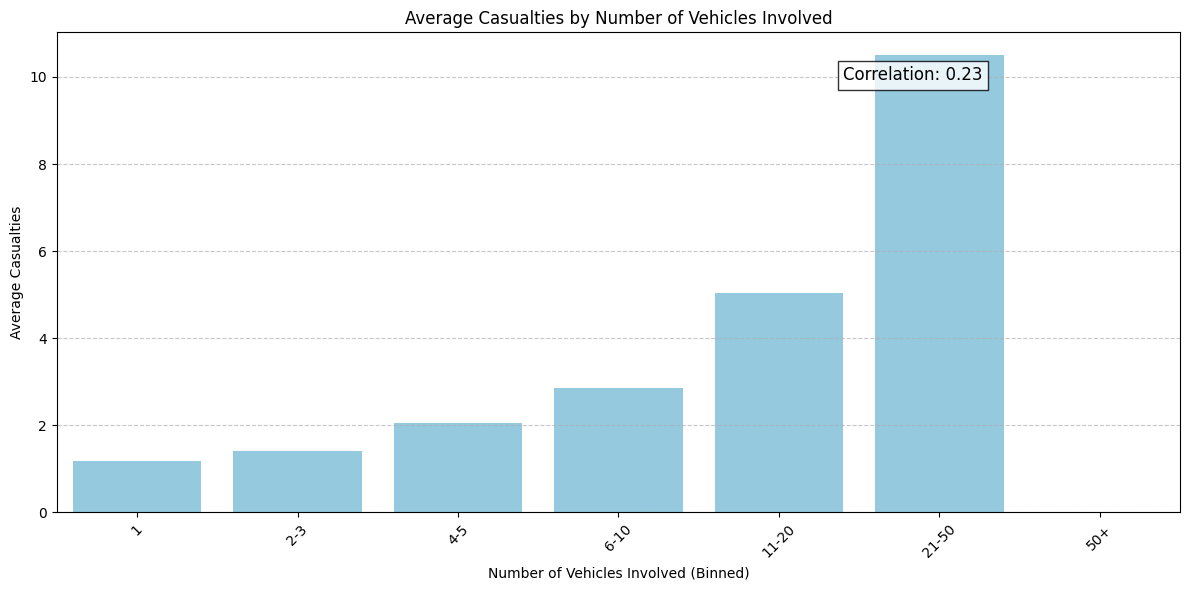

In [78]:
correlation = accident['Number_of_Casualties'].corr(accident['Number_of_Vehicles'])
rounded_corr = round(correlation, 2)

accident['Vehicle_Bins'] = pd.cut(
    accident['Number_of_Vehicles'], 
    bins=[0, 1, 3, 5, 10, 20, 50, 100],
    labels=['1', '2-3', '4-5', '6-10', '11-20', '21-50', '50+']
)

binned_data = (
    accident.groupby('Vehicle_Bins', observed=True)['Number_of_Casualties']
    .mean()
    .reset_index()
)

plt.figure(figsize=(12, 6))

ax = sns.barplot(
    x='Vehicle_Bins',
    y='Number_of_Casualties',
    data=binned_data,
    color='skyblue',
    errorbar='sd',         
    err_kws={'linewidth': 1.5},  
    capsize=0.1             
)

plt.text(
    0.7, 0.9, 
    f'Correlation: {rounded_corr}',
    transform=ax.transAxes,
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.8)
)
plt.title('Average Casualties by Number of Vehicles Involved')
plt.xlabel('Number of Vehicles Involved (Binned)')
plt.ylabel('Average Casualties')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1>Insight 15:Why are accidents more severe during low-light conditions?</h1>

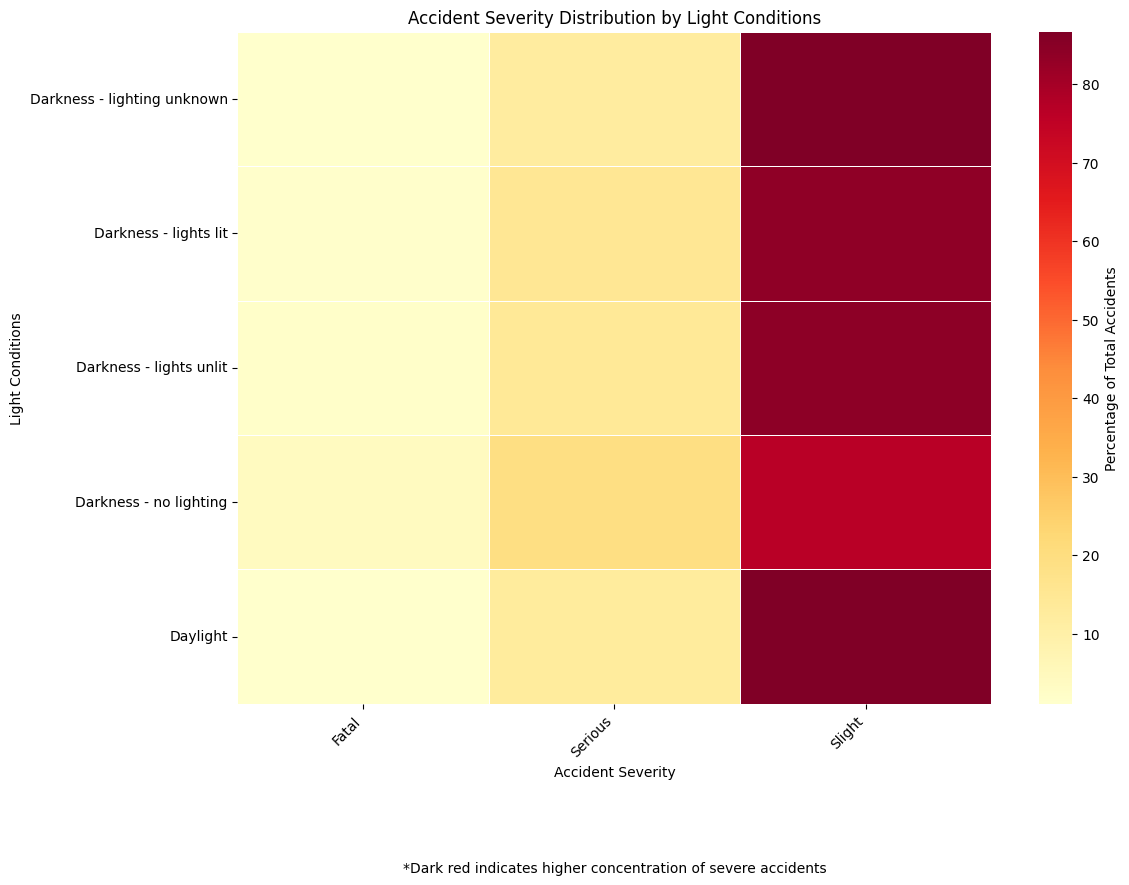

In [83]:
severity_light = (
    accident.groupby(['Light_Conditions', 'Accident_Severity'])
    .size()
    .unstack(fill_value=0)
)

severity_light_pct = severity_light.div(severity_light.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 8))

sns.heatmap(
    severity_light_pct,
    cmap='YlOrRd',
    fmt='d',
    linewidths=0.5,
    annot_kws={"size": 10},
    cbar_kws={'label': 'Percentage of Total Accidents'}
)

plt.title('Accident Severity Distribution by Light Conditions')
plt.xlabel('Accident Severity')
plt.ylabel('Light Conditions')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.text(
    0.5, -0.25,
    "*Dark red indicates higher concentration of severe accidents",
    ha='center',
    transform=plt.gca().transAxes,
    fontsize=10
)
plt.show()

<h1>Insights 16: How accident severity varies with different weather conditions?</h1>

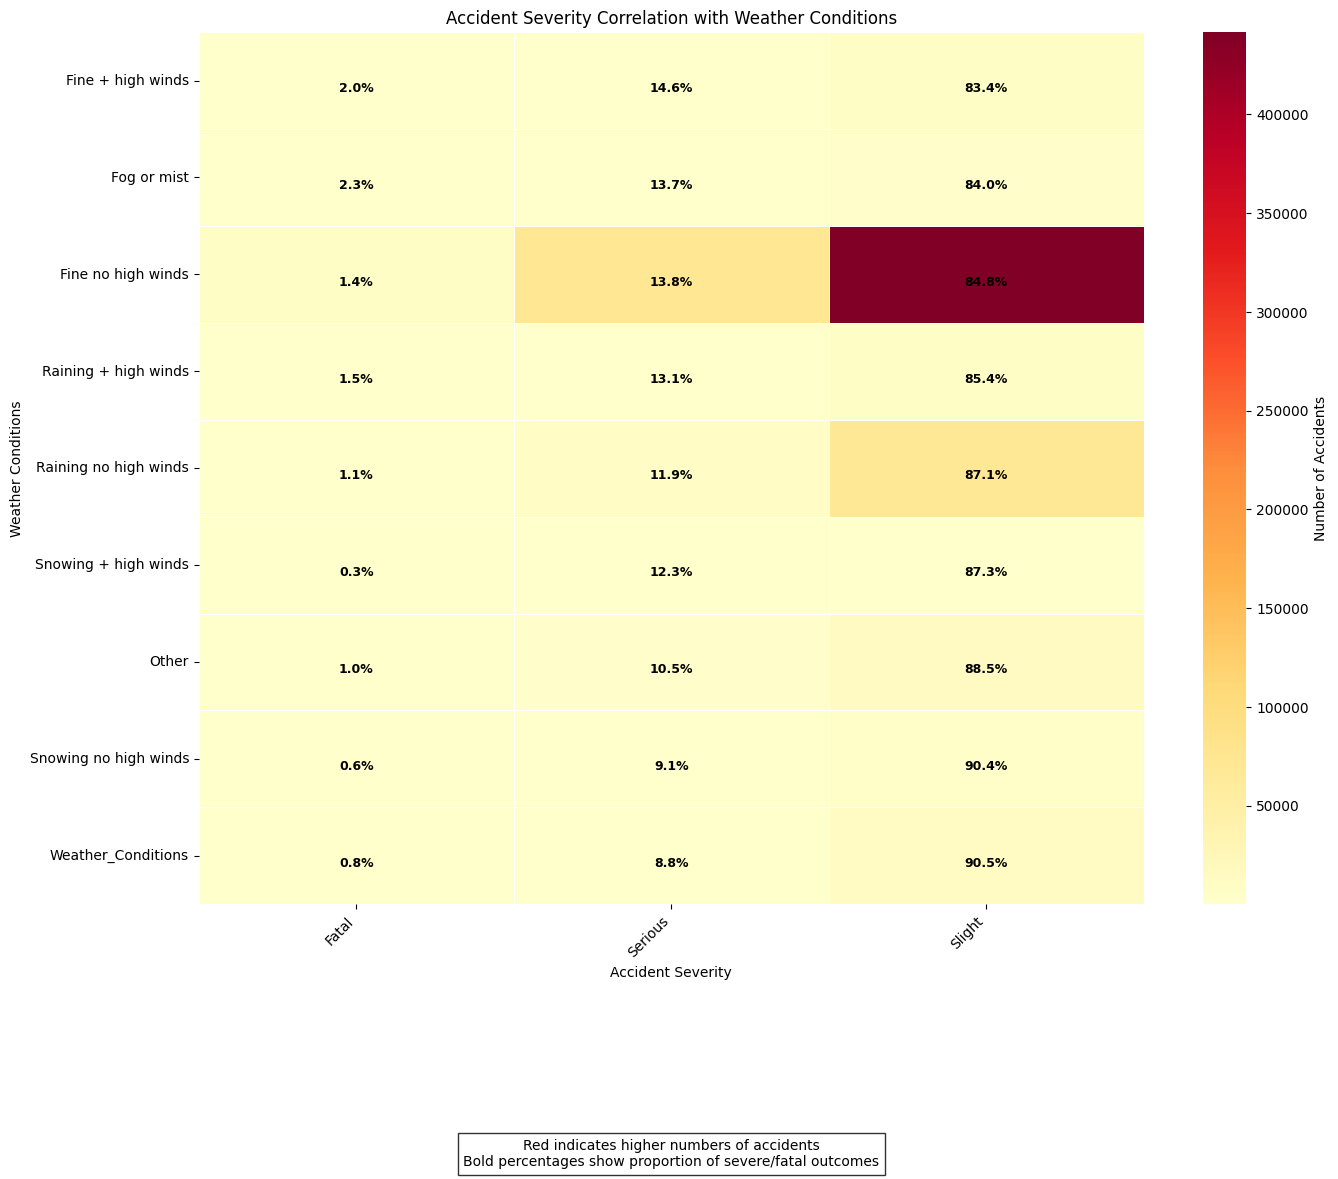

In [88]:
severity_weather = (
    accident.groupby(['Weather_Conditions', 'Accident_Severity'])
    .size()
    .unstack(fill_value=0)
)

severity_weather_pct = severity_weather.div(severity_weather.sum(axis=1), axis=0) * 100

severity_weather_pct['Severe_Risk'] = severity_weather_pct[['Fatal', 'Serious']].sum(axis=1)
sorted_weather = severity_weather_pct.sort_values('Severe_Risk', ascending=False).drop('Severe_Risk', axis=1)
sorted_weather_counts = severity_weather.loc[sorted_weather.index]

plt.figure(figsize=(14, 10))

sns.heatmap(
    sorted_weather_counts,
    cmap='YlOrRd',  
    fmt='',
    linewidths=0.5,
    cbar_kws={'label': 'Number of Accidents'},
    annot_kws={"size": 10, "color": "black"}
)

for i, (_, row) in enumerate(sorted_weather.iterrows()):
    for j, val in enumerate(row):
        plt.text(
            j + 0.5,
            i + 0.5,
            f'\n{val:.1f}%',
            ha='center',
            va='center',
            color='black',
            fontsize=9,
            fontweight='bold'
        )

# Customize plot
plt.title('Accident Severity Correlation with Weather Conditions')
plt.xlabel('Accident Severity')
plt.ylabel('Weather Conditions')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.text(
    0.5, -0.3,
    "Red indicates higher numbers of accidents\nBold percentages show proportion of severe/fatal outcomes",
    ha='center',
    transform=plt.gca().transAxes,
    fontsize=10,
    bbox=dict(facecolor='white', alpha=0.8)
)
plt.show()

<h1>Insights 17: What are the District and road types with the highest accidents frequencies?</h1>

While Birmingham has the highest overall number of accidents, Birmingham experiences a disproportionately high number of accidents on Single carriageway, suggesting a potential need for targeted safety improvements in that specific area.


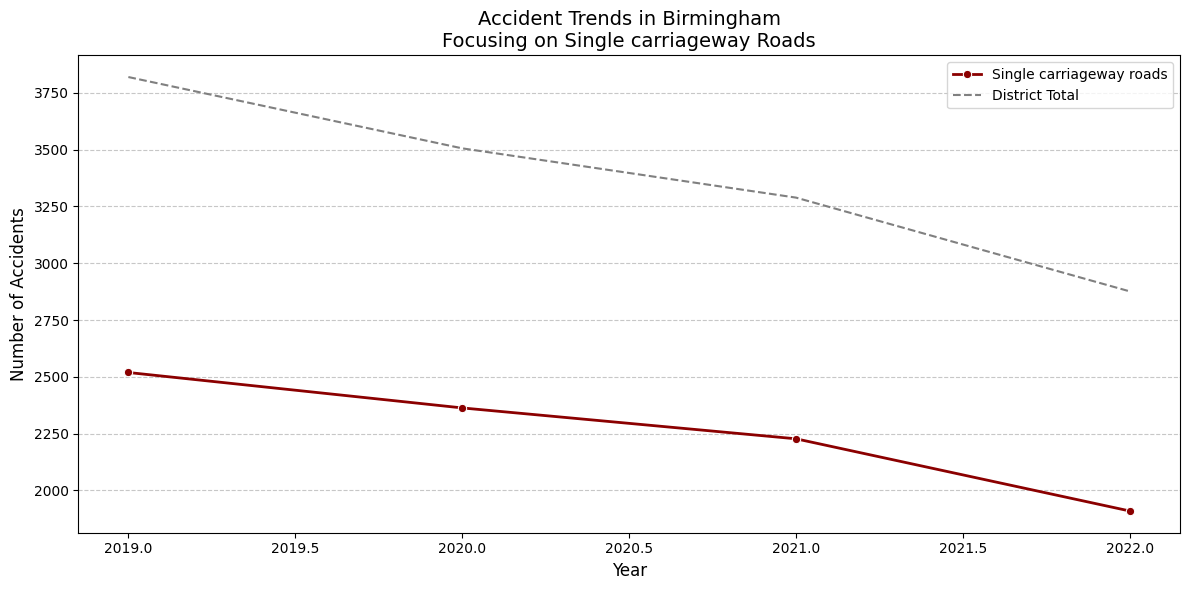

In [93]:
accident_counts = accident.groupby(['District Area', 'Road_Type']).size().reset_index(name='Accidents')
highest_district = accident_counts.groupby('District Area')['Accidents'].sum().idxmax()
district_data = accident_counts[accident_counts['District Area'] == highest_district]
print(f'While {highest_district} has the highest overall number of accidents, {highest_district} experiences a disproportionately high number of accidents on {highest_road_type}, suggesting a potential need for targeted safety improvements in that specific area.')
highest_road_type = district_data.loc[district_data['Accidents'].idxmax(), 'Road_Type']

if 'Year' in accident.columns:
    time_data = accident[
        (accident['District Area'] == highest_district) &
        (accident['Road_Type'] == highest_road_type)
    ].groupby('Year').size().reset_index(name='Accidents')

    plt.figure(figsize=(12, 6))
    sns.lineplot(
        x='Year',
        y='Accidents',
        data=time_data,
        marker='o',
        color='darkred',
        linewidth=2,
        label=f'{highest_road_type} roads'
    )

    district_trend = accident[
        accident['District Area'] == highest_district
    ].groupby('Year').size().reset_index(name='Total')
    
    sns.lineplot(
        x='Year',
        y='Total',
        data=district_trend,
        linestyle='--',
        color='gray',
        label='District Total'
    )

    plt.title(f'Accident Trends in {highest_district}\nFocusing on {highest_road_type} Roads', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Accidents', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()

else:
    plt.figure(figsize=(12, 6))

    sns.lineplot(
        x='Road_Type',
        y='Accidents',
        data=district_data,
        marker='o',
        color='gray',
        label='Other Road Types'
    )
    critical_road = district_data[district_data['Road_Type'] == highest_road_type]
    plt.plot(
        critical_road['Road_Type'],
        critical_road['Accidents'],
        marker='o',
        markersize=10,
        color='darkred',
        linewidth=3,
        label=f'{highest_road_type} Roads'
    )
    plt.title(f'Accident Distribution in {highest_district}\nHighlighting {highest_road_type} Roads')
    plt.xlabel('Road Type')
    plt.ylabel('Number of Accidents')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
plt.show()

<h1>Insights 18: Areas with higher casualty rates per accident, suggesting potentially more dangerous road conditions. </h1>

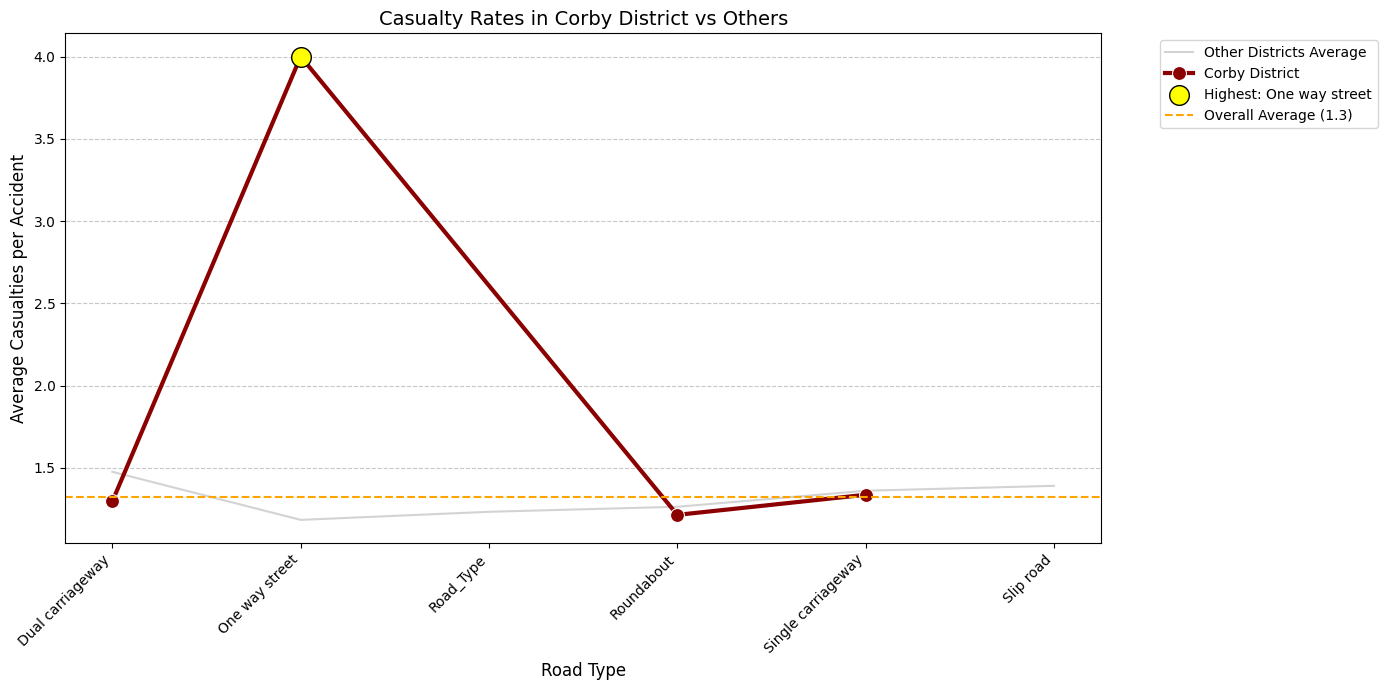

In [97]:
avg_casualties = accident.groupby(['District Area', 'Road_Type'])['Number_of_Casualties'].mean().reset_index()
highest_avg = avg_casualties.loc[avg_casualties['Number_of_Casualties'].idxmax()]
district_filter = highest_avg['District Area']
road_filter = highest_avg['Road_Type']

district_data = avg_casualties[avg_casualties['District Area'] == district_filter]
other_districts = avg_casualties[avg_casualties['District Area'] != district_filter]

plt.figure(figsize=(14, 7))

sns.lineplot(
    x='Road_Type',
    y='Number_of_Casualties',
    data=other_districts,
    errorbar=None,  
    estimator='mean',
    color='lightgray',
    label='Other Districts Average'
)

sns.lineplot(
    x='Road_Type',
    y='Number_of_Casualties',
    data=district_data,
    marker='o',
    markersize=10,
    linewidth=3,
    color='darkred',
    label=f'{district_filter} District',
    errorbar=None 
)

critical_point = district_data[district_data['Road_Type'] == road_filter]
plt.scatter(
    x=critical_point['Road_Type'],
    y=critical_point['Number_of_Casualties'],
    color='yellow',
    s=200,
    edgecolor='black',
    zorder=5,
    label=f'Highest: {road_filter}'
)


overall_avg = avg_casualties['Number_of_Casualties'].mean()
plt.axhline(
    overall_avg,
    color='orange',
    linestyle='--',
    label=f'Overall Average ({overall_avg:.1f})'
)

plt.title(f'Casualty Rates in {district_filter} District vs Others', fontsize=14)
plt.xlabel('Road Type', fontsize=12)
plt.ylabel('Average Casualties per Accident', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<h1>Insights 19: Which combinations of weather and road surface conditions lead to the highest average number of casualties?</h1>

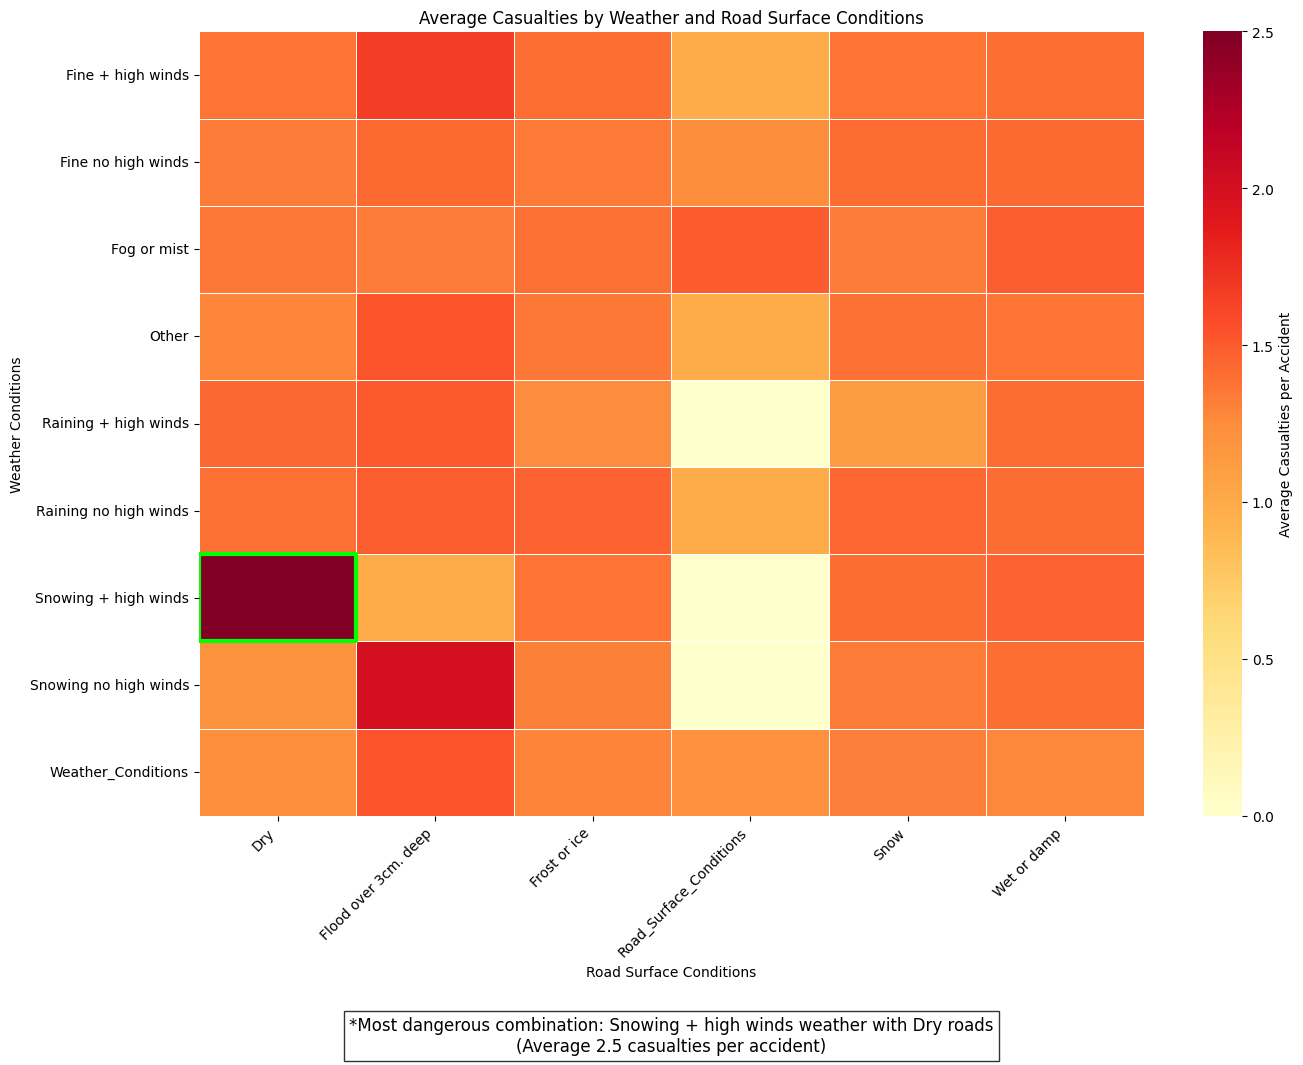

In [99]:
avg_casualties = (
    accident.groupby(['Weather_Conditions', 'Road_Surface_Conditions'])['Number_of_Casualties']
    .mean()
    .unstack(fill_value=0)
)

max_val = avg_casualties.max().max()
max_coords = np.where(avg_casualties == max_val)
max_weather = avg_casualties.index[max_coords[0][0]]
max_road = avg_casualties.columns[max_coords[1][0]]

plt.figure(figsize=(14, 10))

sns.heatmap(
    avg_casualties,
    cmap='YlOrRd',      
    fmt=".1f",
    linewidths=0.5,
    cbar_kws={'label': 'Average Casualties per Accident'}
)

plt.gca().add_patch(
    plt.Rectangle(
        (max_coords[1][0], max_coords[0][0]),
        1, 1,
        fill=False,
        edgecolor='lime',
        lw=3
    )
)

plt.title('Average Casualties by Weather and Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Weather Conditions')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.text(
    0.5, -0.3,
    f"*Most dangerous combination: {max_weather} weather with {max_road} roads\n(Average {max_val:.1f} casualties per accident)",
    ha='center',
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.8)
)
plt.show()

<h1> Insights 20: Districts with high accident rates in either Urban or Rural Areas.

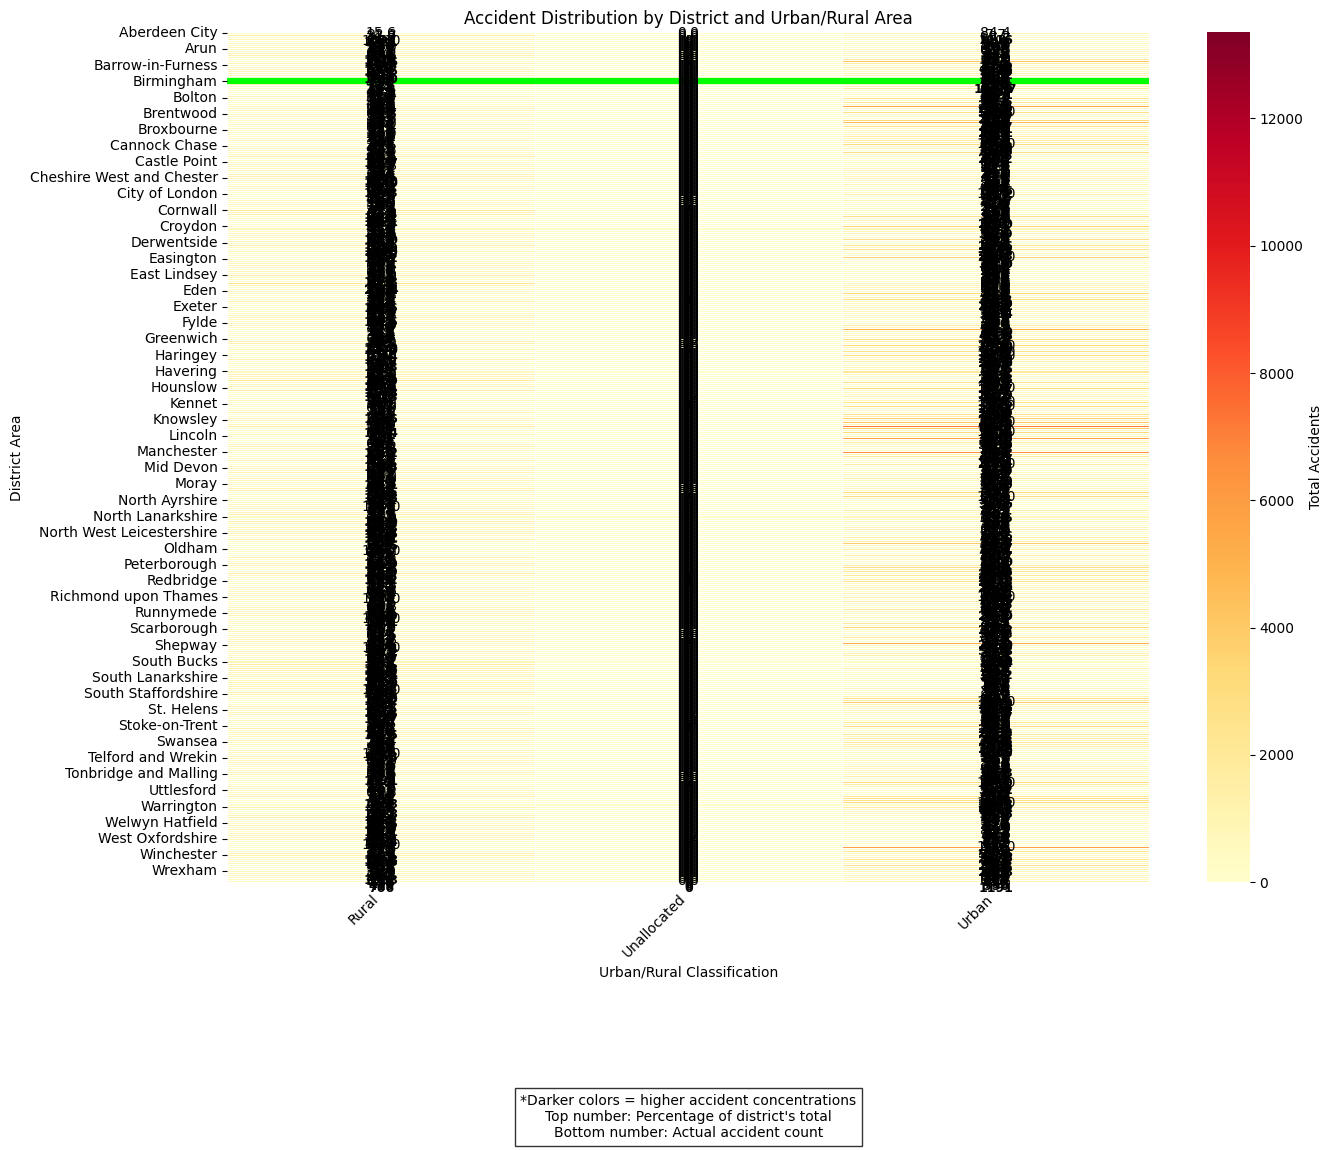

In [107]:
district_counts = (
    accident.groupby(['District Area', 'Urban_or_Rural_Area'])
    .size()
    .unstack(fill_value=0)
)

district_pct = district_counts.div(district_counts.sum(axis=1), axis=0) * 100

max_district = district_counts.sum(axis=1).idxmax()

plt.figure(figsize=(14, 10))

sns.heatmap(
    district_counts,
    cmap='YlOrRd',  
    annot=np.round(district_pct.values, 1),
    fmt='',
    linewidths=0.5,
    cbar_kws={'label': 'Total Accidents'},
    annot_kws={"size": 10, "color": "black"}
)

for i, (_, row) in enumerate(district_counts.iterrows()):
    for j, val in enumerate(row):
        plt.text(
            j + 0.5,
            i + 0.5,
            f'\n{val}',
            ha='center',
            va='center',
            color='black',
            fontsize=9,
            fontweight='bold'
        )
if max_district in district_counts.index:
    max_row = district_counts.index.get_loc(max_district)
    plt.gca().add_patch(
        plt.Rectangle(
            (0, max_row),
            len(district_counts.columns),
            1,
            fill=False,
            edgecolor='lime',
            lw=3
        )
    )
plt.title('Accident Distribution by District and Urban/Rural Area')
plt.xlabel('Urban/Rural Classification')
plt.ylabel('District Area')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.text(
    0.5, -0.3,
    "*Darker colors = higher accident concentrations\nTop number: Percentage of district's total\nBottom number: Actual accident count",
    ha='center',
    transform=plt.gca().transAxes,
    fontsize=10,
    bbox=dict(facecolor='white', alpha=0.8)
)

plt.show()